## Example with secondary neutrinos

The following is a 1D simulation including secondary neutrinos from photopion production and nuclear decay.
Hadrons and Neutrinos are stored separately using two observers.

In [3]:
from crpropa import *

neutrinos = True
photons = False

# module setup
m = ModuleList()
m.add(SimplePropagation(10*kpc, 10*Mpc))
m.add(Redshift())
m.add(PhotoPionProduction(CMB, photons, neutrinos))
m.add(PhotoPionProduction(IRB, photons, neutrinos))
# m.add(PhotoDisintegration(CMB))  # we are propagating only protons
# m.add(PhotoDisintegration(EBL))
m.add(NuclearDecay(photons, neutrinos))
m.add(ElectronPairProduction(CMB))
m.add(ElectronPairProduction(IRB))
m.add(MinimumEnergy(10**17 * eV))

# observer for hadrons
obs1 = Observer()
obs1.add(ObserverPoint())
obs1.add(ObserverNeutrinoVeto())
obs1.onDetection( TextOutput('out-nucleons.txt', '1D events') )
m.add(obs1)
# observer for neutrinos
obs2 = Observer()
obs2.add(ObserverPoint())
obs2.add(ObserverNucleusVeto())
obs2.onDetection( TextOutput('out-neutrinos.txt', '1D events') )
m.add(obs2)

# source: protons with power-law spectrum from uniformly distributed sources with redshift z = 0-3
source = Source()
source.add(SourceUniform1D(0, redshift2ComovingDistance(3)))
source.add(SourceRedshift1D())
source.add(SourcePowerLawSpectrum(10**17 * eV, 10**22 * eV, -1))
source.add(SourceParticleType(nucleusId(1, 1)))

# run simulation for 1000 primaries and propagate all secondaries
m.setShowProgress(True)
m.run(source, 5000, True)



### Plotting the neutrino energy distribution

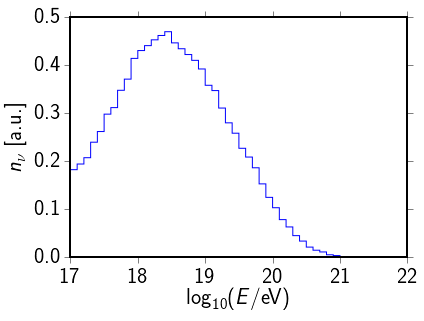

In [2]:
%matplotlib inline
from pylab import *

d = genfromtxt('out-neutrinos.txt', names=True)
hist(log10(d['E']) + 18, bins=linspace(17, 22, 51), histtype='step', normed=True)
xlabel(r'$\log_{10}(E/\text{eV})$')
ylabel(r'$n_\nu$ [a.u.]')


